In [1]:
import ffn
#%pylab inline

In [2]:
data = ffn.get('agg,hyg,spy,eem,efa', start='2010-01-01', end='2014-01-01')
data.head()

                  agg        hyg        spy        eem        efa
Date                                                             
2010-01-04  76.880875  46.122734  91.475693  34.109280  41.033138
2010-01-05  77.230598  46.341541  91.717857  34.356842  41.069305
2010-01-06  77.185966  46.461365  91.782425  34.428719  41.242893
2010-01-07  77.096664  46.648941  92.169884  34.229061  41.083767
2010-01-08  77.141350  46.721859  92.476562  34.500587  41.409260


By default, the data is downloaded from Yahoo! Finance and the Adjusted Close is used as the security's price. Other data sources are also available and you may select other fields as well. Fields are specified by using the following format: {ticker}:{field}. So, if we want to get the Open, High, Low, Close for aapl, we would do the following:

In [3]:
ffn.get('aapl:Open,aapl:High,aapl:Low,aapl:Close', start='2010-01-01', end='2014-01-01').head()

            aaplopen  aaplhigh   aapllow  aaplclose
Date                                               
2010-01-04  7.622500  7.660714  7.585000   7.643214
2010-01-05  7.664286  7.699643  7.616071   7.656428
2010-01-06  7.656428  7.686786  7.526786   7.534643
2010-01-07  7.562500  7.571429  7.466072   7.520714
2010-01-08  7.510714  7.571429  7.466429   7.570714


In [7]:
data = ffn.get('dbc', provider=ffn.data.csv, path='test_data.csv', existing=data)
data.head()

              agg    hyg     spy    eem    efa    dbc
Date                                                 
2010-01-04  90.45  64.87  103.44  39.32  49.08  25.24
2010-01-05  90.86  65.18  103.71  39.61  49.13  25.27
2010-01-06  90.81  65.35  103.79  39.69  49.33  25.72
2010-01-07  90.70  65.61  104.23  39.46  49.14  25.40
2010-01-08  90.75  65.72  104.57  39.77  49.53  25.38

[5 rows x 6 columns]


In [8]:
returns = data.to_log_returns().dropna()
returns.head()

                 agg       hyg       spy       eem       efa       dbc
Date                                                                  
2010-01-05  0.004523  0.004767  0.002607  0.007348  0.001018  0.001188
2010-01-06 -0.000550  0.002605  0.000771  0.002018  0.004063  0.017651
2010-01-07 -0.001212  0.003971  0.004230 -0.005812 -0.003859 -0.012520
2010-01-08  0.000551  0.001675  0.003257  0.007825  0.007905 -0.000788
2010-01-11 -0.000772 -0.000913  0.001433 -0.002014  0.008244 -0.003157

[5 rows x 6 columns]


Let's look at the different distributions to see how they look.

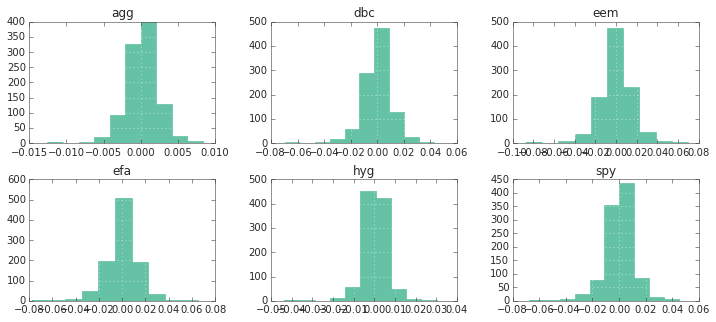

In [9]:
ax = returns.hist(figsize=(12, 5))

We can also use the numerous functions packed into numpy, pandas and the like to further analyze the returns. For example, we can use the corr function to get the pairwise correlations between assets.

In [10]:
returns.corr().as_format('.2f')

agg    hyg    spy    eem    efa    dbc
agg   1.00  -0.11  -0.33  -0.23  -0.29  -0.18
hyg  -0.11   1.00   0.77   0.75   0.76   0.49
spy  -0.33   0.77   1.00   0.88   0.92   0.59
eem  -0.23   0.75   0.88   1.00   0.90   0.62
efa  -0.29   0.76   0.92   0.90   1.00   0.61
dbc  -0.18   0.49   0.59   0.62   0.61   1.00

[6 rows x 6 columns]

Here we used the convenience method as_format to have a prettier output. We could also plot a heatmap to better visualize the results.

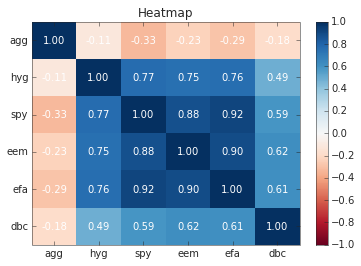

In [11]:
returns.plot_corr_heatmap()

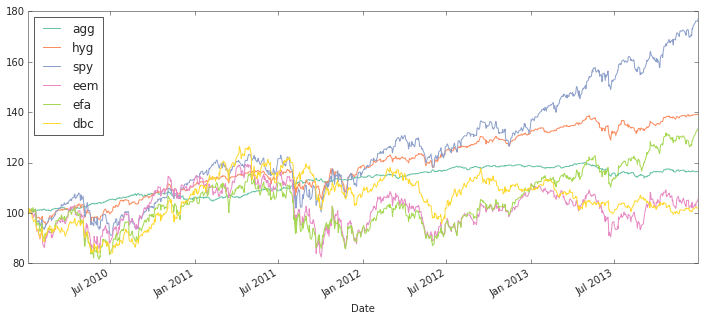

In [12]:
ax = data.rebase().plot(figsize=(12,5))

In [13]:
perf = data.calc_stats()

Now that we have our GroupStats object, we can analyze the performance in greater detail. For example, the **plot** method yields a graph similar to the one above.

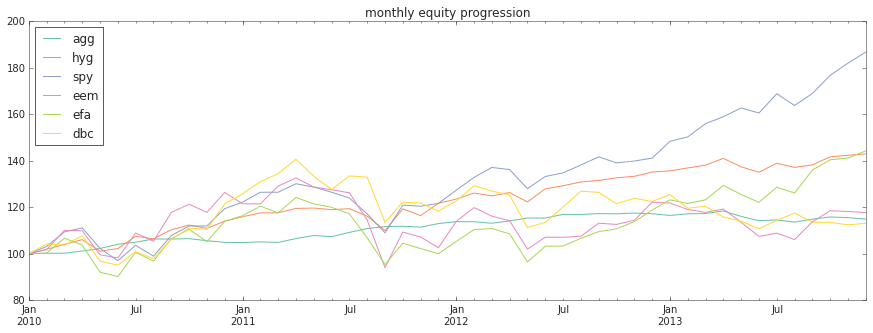

In [14]:
perf.plot()

We can also display a wide array of statistics that are all contained in the PerformanceStats object. This will probably look crappy in the docs, but do try it out in a Notebook. We are also actively trying to improve the way we display this wide array of stats.

In [15]:
perf.display()

Stat                 agg         hyg         spy         eem         efa         dbc
-------------------  ----------  ----------  ----------  ----------  ----------  ----------
Start                2010-01-04  2010-01-04  2010-01-04  2010-01-04  2010-01-04  2010-01-04
End                  2013-12-31  2013-12-31  2013-12-31  2013-12-31  2013-12-31  2013-12-31

Total Return         16.36%      39.23%      76.91%      5.47%       33.44%      1.66%
Daily Sharpe         1.11        0.97        0.93        0.18        0.44        0.11
CAGR                 3.87%       8.65%       15.37%      1.34%       7.50%       0.41%
Max Drawdown         -5.14%      -10.07%     -18.61%     -30.87%     -25.86%     -24.34%

MTD                  -0.56%      0.41%       2.59%       -0.41%      2.17%       0.59%
3m                   0.02%       3.42%       10.52%      3.47%       6.07%       -0.39%
6m                   0.57%       5.85%       16.32%      9.54%       18.11%      2.11%
YTD                  -1.97

Lots to look at here. We can also access the underlying PerformanceStats for each series, either by index or name.

In [16]:
# we can also use perf[2] in this case
perf['spy'].display_monthly_returns()

  Year    Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep    Oct    Nov    Dec    YTD
------  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----
  2010  -5.24   3.12   6.08   1.55  -7.94  -5.18   6.83  -4.5    8.96   3.82   0      6.68  13.14
  2011   2.33   3.47   0.01   2.9   -1.12  -1.69  -2     -5.5   -6.94  10.92  -0.41   1.05   1.9
  2012   4.64   4.34   3.22  -0.67  -6      4.06   1.18   2.51   2.54  -1.82   0.56   0.9   15.99
  2013   5.12   1.27   3.8    1.92   2.36  -1.34   5.17  -3      3.17   4.63   2.97   2.59  32.3


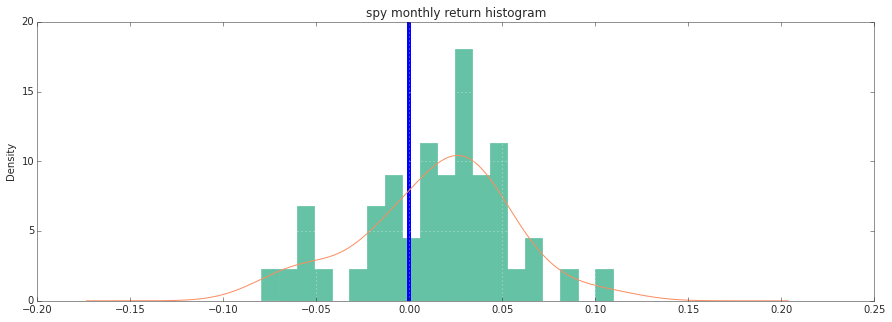

In [17]:
perf[2].plot_histogram()

Most of the stats are also available as pandas objects - see the **stats, return_table, lookback_returns** attributes.

In [18]:
perf['spy'].stats

start                    2010-01-04 00:00:00
end                      2013-12-31 00:00:00
total_return                       0.7691415
daily_sharpe                       0.9343834
cagr                               0.1537473
max_drawdown                      -0.1860885
mtd                               0.02589976
three_month                        0.1052059
six_month                          0.1631602
ytd                                0.3230191
three_year                         0.1606551
daily_mean                          0.157277
daily_vol                          0.1683217
daily_skew                        -0.3877139
daily_kurt                          4.021851
best_day                          0.04646752
worst_day                        -0.06507669
monthly_sharpe                      1.220851
monthly_mean                       0.1699025
monthly_vol                        0.1391673
monthly_skew                      -0.3188291
monthly_kurt                       0.2366642
best_month

In [19]:
returns.calc_mean_var_weights().as_format('.2%')

agg    79.57%
dbc     0.00%
eem     0.00%
efa     0.00%
hyg     6.39%
spy    14.03%
dtype: object

Some other interesting functions are the clustering routines, such as a Python implementation of David Varadi's Fast Threshold Clustering Algorithm (FTCA)

In [20]:
returns.calc_ftca(threshold=0.8)

{1: ['eem', 'spy', 'efa'], 2: ['agg'], 3: ['dbc'], 4: ['hyg']}